In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
data.groupby(["MaritalDesc", "Sex"])["Salary"].agg(min_salary = ("min"), median_salary = ("median"), max_salary = ("max"), avarage_salary = ("mean"))

min_salary  median_salary  max_salary  avarage_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
data.groupby("TermReason").agg(total_termination = ("TermReason", "count"))\
    .sort_values(by = ["total_termination"], ascending = 0).iloc[0:5]

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
data2 = data.loc[(data["PerformanceScore"] == "Exceeds")]
data2.groupby("RecruitmentSource").agg(total_recruit = ("RecruitmentSource", "count")).sort_values(by = ["total_recruit"], ascending = 0)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
data.groupby("Department").agg(ManagerName = ("ManagerName", "nunique"))

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
data.groupby("Sex")["Termd"].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

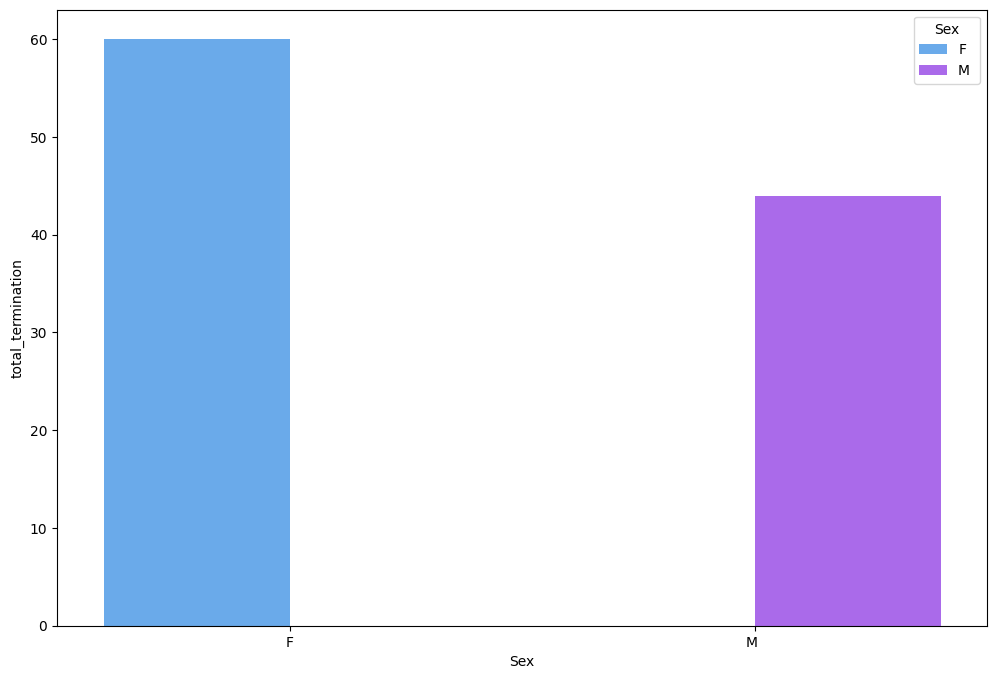

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

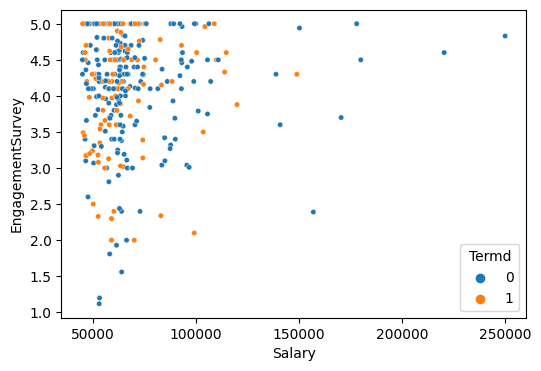

In [ ]:
term = data[["Termd", "Salary", "EngagementSurvey"]]
f, ax = plt.subplots(1, 1, figsize=(6, 4))
ax = sns.scatterplot(x = "Salary", y = "EngagementSurvey", data = term, hue = "Termd", s=15)

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

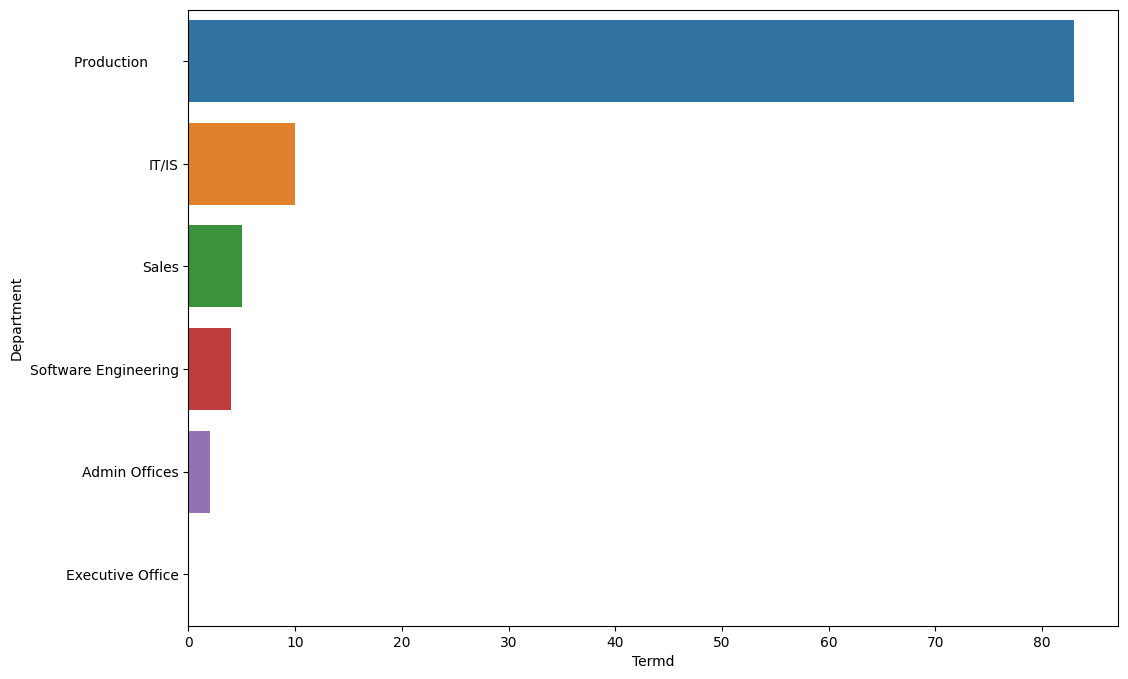

In [ ]:
term = data.groupby("Department").agg({"Termd":"sum"}).reset_index().sort_values("Termd", ascending = 0)

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x = term["Termd"], y = term["Department"], orient="h")

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

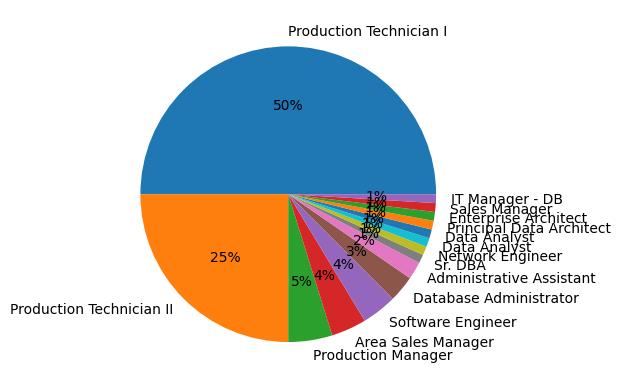

In [ ]:
termd = data.groupby("Position").agg({"Termd": "sum"}).reset_index().sort_values("Termd", ascending = False)
termd = termd[termd["Termd"] > 0]

plt.pie(termd["Termd"], labels = termd["Position"], autopct='%.0f%%')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

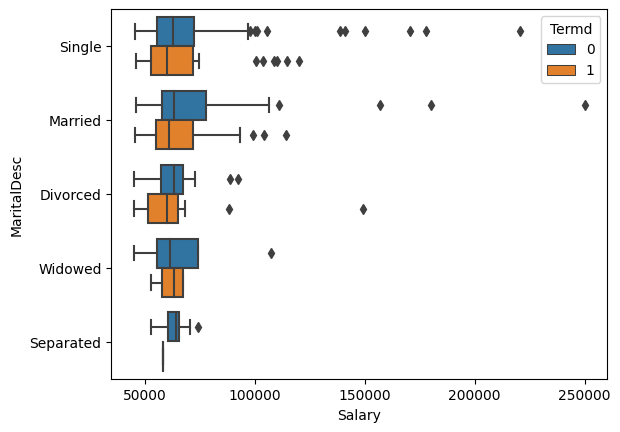

In [ ]:
#code here
sns.boxplot(x = data["Salary"], y = data["MaritalDesc"], data = data, hue = data["Termd"])
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


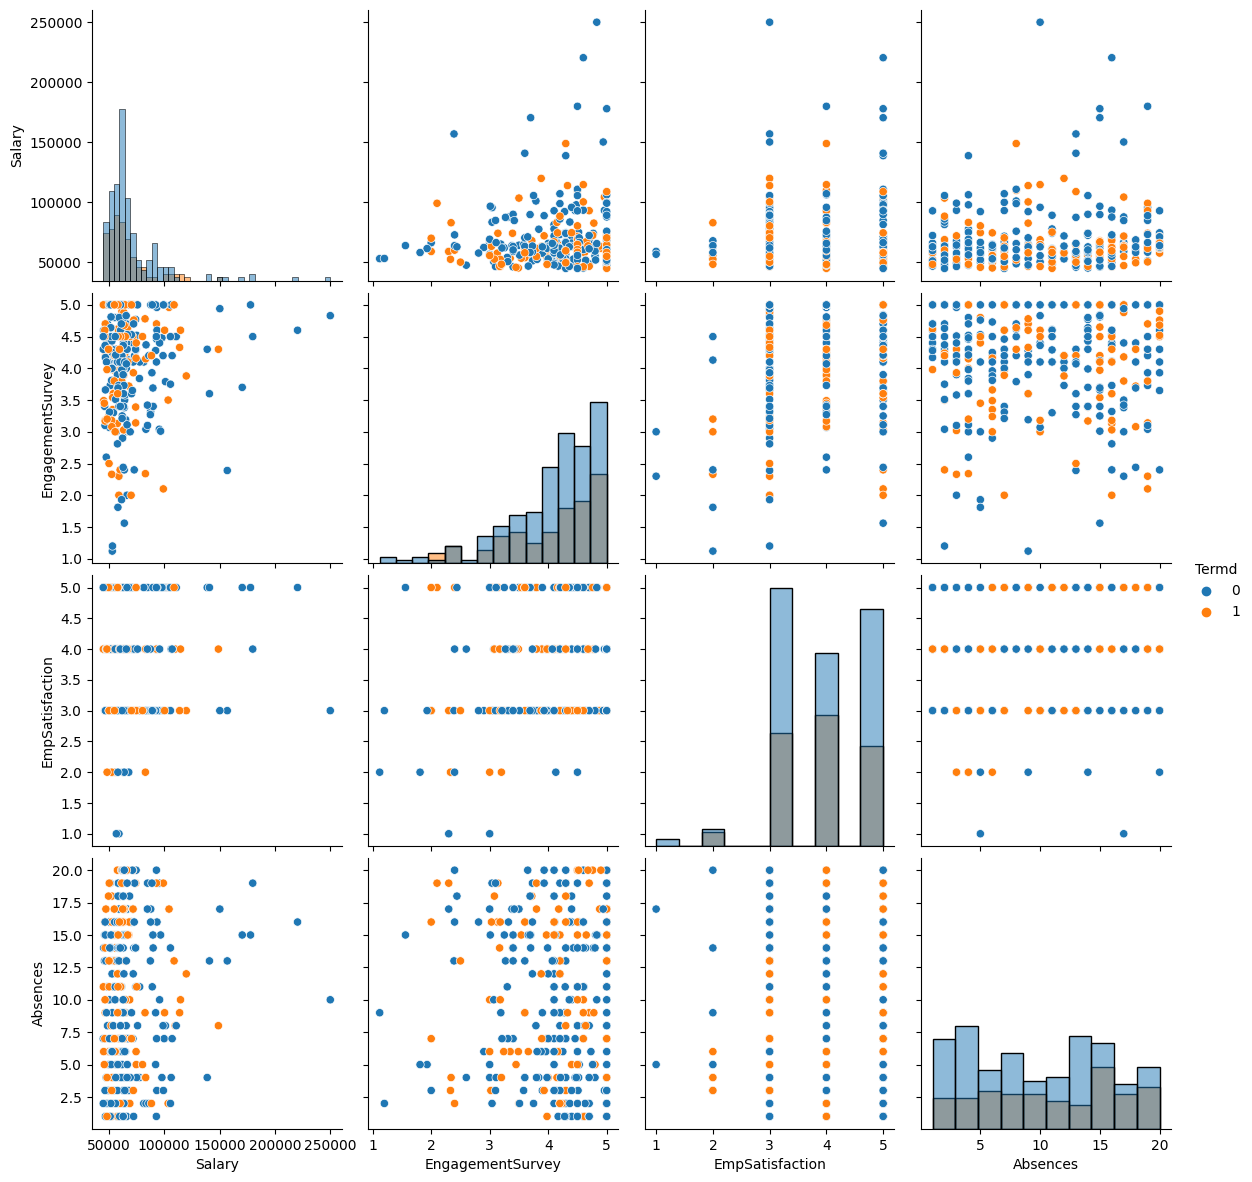

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
data["DOB_date"] = pd.to_datetime(data["DOB"])
data["Year"] = data["DOB_date"].dt.year
data["Age"] = 2022 - data["Year"]
data[["DOB", "DOB_date","Age"]]

data[["DOB", "DOB_date", "Age"]]

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data["Salary_minmax"] = scaler.fit_transform(data[['Salary']])

data[["Salary", "Salary_minmax"]]

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point

In [ ]:
#Setelah diubah category
data_object = data.select_dtypes(include = ["object"]).columns

for column in data_object:
  data[column] = data[column].astype("category")

data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
from sklearn.preprocessing import LabelEncoder

#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point
label_encoder = LabelEncoder()
data['RecruitmentSource'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
data['PerformanceScore'] = label_encoder.fit_transform(data["PerformanceScore"])

data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
y = data["Termd"]

#Independent Variable (feature)
x = data[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
          'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore',
          'Salary_minmax', 'Absences', 'SpecialProjectsCount',
          'EmpSatisfaction', 'EngagementSurvey']]

In [ ]:
y.head(10)

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: Termd, dtype: int64

In [ ]:
x.head(5)

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('train set shape (x_train, y_train):', x_train.shape, y_train.shape)
print('test set shape (x_test, y_test):', x_test.shape, y_test.shape)

train set shape (x_train, y_train): (248, 14) (248,)
test set shape (x_test, y_test): (63, 14) (63,)


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inisialisasi model RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data pelatihan
rf_classifier.fit(x_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = rf_classifier.predict(x_test)

# Mencetak skor klasifikasi, precision, dan recall
classification_report_result = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.72        41
           1       0.30      0.14      0.19        22

    accuracy                           0.59        63
   macro avg       0.47      0.48      0.46        63
weighted avg       0.52      0.59      0.54        63



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Menghitung nilai akurasi
accuracy = accuracy_score(y_test, y_pred) * 100

# Menghitung nilai precision
precision = precision_score(y_test, y_pred) * 100

# Menghitung nilai recall
recall = recall_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")

Accuracy: 58.73%
Precision: 30.00%
Recall: 13.64%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

19. Hasil kinerja karyawan tidak terpengaruh sama sekali oleh manajer mereka. Ini dapat diamati dari independent variabel yang diambil, tidak ada fitur yang manager name atau manager id.

20. Perekrutan dari platform Indeed memiliki total rekrutmen terbanyak yang mencapai tingkat kinerja "Melampau".